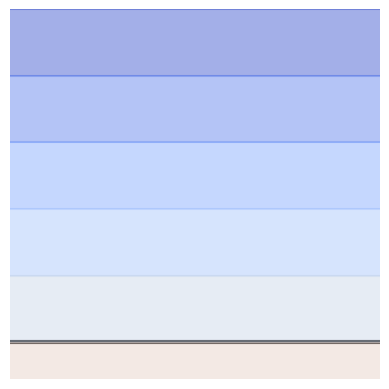

[[-0.1218 -0.0276]
 [ 0.5708 -0.6521]]


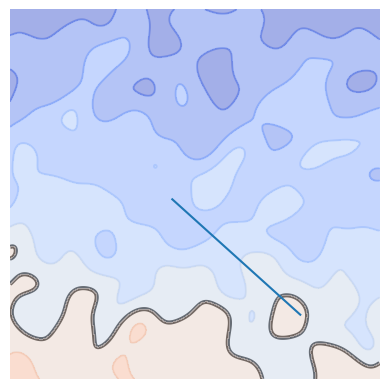

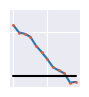

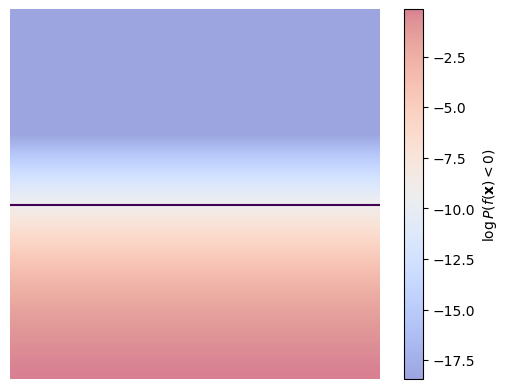

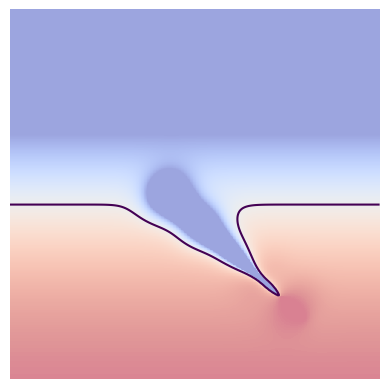

In [77]:
import os
import utils
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import cm
import matplotlib.patches as patches


path = "testing/fs-algo-vis-fig/"


pts = (np.array([
(0.8782,1.0276),
(1.5708, 1.6521)
]) - 1) * np.array([1,-1])

utils.plot_prior(path + f"fs-mean.bin", plt.gca())
plt.axis("off")
plt.savefig(f"figures/fs-algo-vis-fig-mean.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()

utils.plot_prior(path + f"ws-real-400.bin", plt.gca())
print(pts)
plt.plot(pts[:,0], pts[:,1])
plt.axis("off")
plt.savefig(f"figures/fs-algo-vis-fig-real.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()

with plt.style.context("seaborn-v0_8-dark"):
        params = {'text.usetex' : True,
                'font.size' : 7,
                'font.family' : 'Linux Libertine'}
        plt.rcParams.update(params)
        rvs = np.fromfile(path + f"ray-values.bin")
        rts = np.fromfile(path + f"ray-ts.bin")
        fig, axs = plt.subplots(1,1,figsize=(0.9, 1))
        axs.plot(rts, rvs)
        axs.plot(np.linspace(0, rts.max(), 2), np.zeros(2), color="black")
        axs.set_xlim(-0.05, rts.max()+0.06)
        axs.set_ylim(rvs.min()-0.1, rvs.max()*1.3)
        #rvs[31::32] = 0
        axs.scatter(rts[0:4], rvs[0:4], color=(241/255,90/255,41/255),zorder=10,s=1)
        axs.scatter(rts[4:8], rvs[4:8], color=(241/255,90/255,41/255),zorder=10,s=1)
        axs.scatter(rts[8:12], rvs[8:12], color=(241/255,90/255,41/255),zorder=10,s=1)

        axs.grid(which="both")
        axs.xaxis.set_ticklabels([])
        axs.yaxis.set_ticklabels([])
        axs.tick_params(axis=u'both', which=u'both',length=0)

        plt.savefig(f"figures/fs-algo-vis-fig-values.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
        plt.show()

dim = 500
file = path+"cdf.bin"
occupancy = np.reshape(np.fromfile(file, dtype=np.float64), (dim,dim)).T

xs = np.linspace(-1,1, occupancy.shape[0])
xx, yy = np.meshgrid(xs,xs)
#plt.pcolormesh(xx, yy, occupancy, vmin=0, vmax=1, alpha=0.5, cmap="coolwarm", zorder=-10)
CS = plt.pcolormesh(xx, yy, np.log(np.maximum(occupancy, 0.00000001)), alpha=0.5, cmap="coolwarm", zorder=-10)
plt.colorbar(CS, label="$\log P(f(\mathbf{x}) < 0)$")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_aspect("equal")
CS = plt.contour(xx,yy,occupancy,levels=[0.0001])

o_min, o_max = occupancy.min(), occupancy.max()

#CS.collections[0].set_label("$P(f(\\mathbf{x}) < 0) = 0.00001$")
plt.gca().set_rasterization_zorder(-5)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(xs), np.max(xs))
plt.axis("off")
plt.savefig(f"figures/fs-algo-vis-cdf.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()

dim = 500
file = path+"cdf-cond.bin"
occupancy = np.reshape(np.fromfile(file, dtype=np.float64), (dim,dim)).T

xs = np.linspace(-1,1, occupancy.shape[0])
xx, yy = np.meshgrid(xs,xs)
#plt.pcolormesh(xx, yy, occupancy, vmin=0, vmax=1, alpha=0.5, cmap="coolwarm", zorder=-10)
CS = plt.pcolormesh(xx, yy, np.log(np.maximum(occupancy, 0.00000001)), alpha=0.5, cmap="coolwarm", zorder=-10)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_aspect("equal")
CS = plt.contour(xx,yy,occupancy,levels=[0.0001])

#CS.collections[0].set_label("$P(f(\\mathbf{x}) < 0) = 0.00001$")
plt.gca().set_rasterization_zorder(-5)
plt.xlim(np.min(xs), np.max(xs))
plt.ylim(np.min(xs), np.max(xs))
plt.axis("off")
plt.savefig(f"figures/fs-algo-vis-cdf-cond.pdf", bbox_inches='tight',pad_inches = 0, dpi = 300)
plt.show()
